In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib, matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
X = pd.read_csv('/kaggle/input/titanic/train.csv')
X_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
sex_describe = X.pivot_table(index='Sex', values='Survived')

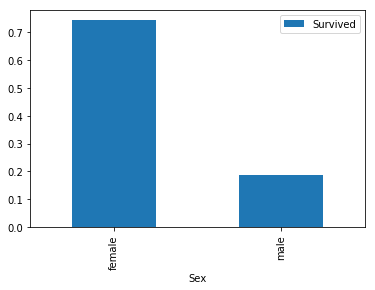

In [4]:
sex_describe.plot.bar()

#more women survived than children

In [5]:
class_describe = X.pivot_table(index='Pclass', values='Survived')

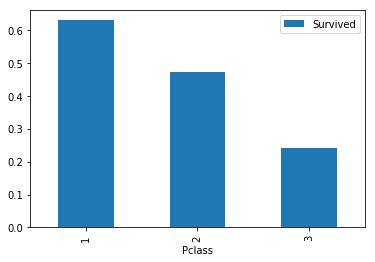

In [6]:
class_describe.plot.bar()
#as expected more first class survive - should this be set as a categorical variable though,
#since 3 is a lower class than 1 - its nominal not ordinal

In [7]:
X.Age.describe() # we have missing values, 714

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
survived = X[X.Survived == 1]
dead = X[X.Survived == 0]

In [9]:
#plt.hist(dead['Sex'])

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([12.,  3.,  0.,  5.,  7.,  4.,  0.,  2.,  1.,  2.,  2.,  0.,  0.,
         1.,  1.,  2.,  0.,  3.,  4.,  6.,  6.,  0.,  9.,  9.,  3.,  5.,
         0., 11.,  5., 15.,  6.,  0.,  6., 11.,  7.,  8.,  0., 10.,  8.,
         9.,  7.,  0.,  6., 11., 11.,  1.,  0.,  5.,  5.,  6.,  2.,  0.,
         6.,  1.,  3.,  0.,  5.,  0.,  1.,  6.,  0.,  4.,  5.,  2.,  3.,
         0.,  1.,  3.,  1.,  2.,  0.,  0.,  3.,  0.,  2.,  0.,  0.,  2.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42  ,  1.2158,  2.0116,  2.8074,  3.6032,  4.399 ,  5.1948,
         5.9906,  6.7864,  7.5822,  8.378 ,  9.1738,  9.9696, 10.7654,
        11.5612, 12.357 , 13.1528, 13.9486, 14.7444, 15.5402, 16.336 ,
        17.1318, 17.9276, 18.7234, 19.5192, 20.315 , 21.1108, 21.9066,
        22.7024, 23.4982, 24.294 , 25.0898, 25.8856, 26.6814, 27.4772,
        28.273 , 29.0688, 29.8646, 30.6604, 31.4562, 32.252 , 33.0478,
        

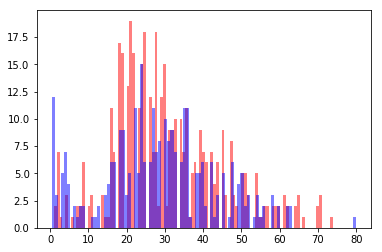

In [10]:
plt.hist(dead['Age'], bins=100, color='r', alpha=0.5)
plt.hist(survived['Age'], bins=100, color='b', alpha=0.5)

In [11]:
# above shows that around <1 year of age, there is a much greater chance of survival. 
# age 20 - 30s died a lot

In [12]:
def comp_age(df, cutoffs, labels):
    df['Age_fill'] = df['Age'].fillna(-0.5)
    df['Age_cats'] = pd.cut(df['Age_fill'], cutoffs, labels=labels)
    return df

In [13]:
cutoffs = [-1, 0, 5, 12, 18, 30, 60, 100]
labels = ['Missing', 'Infant', 'Child', 'Teenager','Young_adult', 'Adult', 'Elderly']
X = comp_age(X, cutoffs, labels)

In [14]:
age_pivot = X.pivot_table(index='Age_cats', values='Survived')

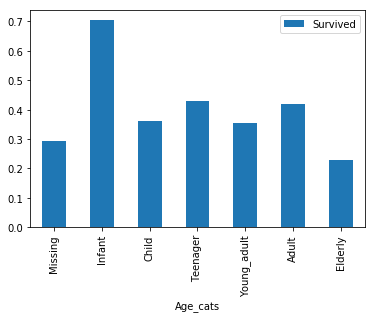

In [15]:
age_pivot.plot.bar()

In [16]:
#yes we can see that like in movie infants survive most


In [17]:
X.Parch.value_counts()
# Most people had no kids, 1 or 2 kids was second most popular

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
parch_pivot = X.pivot_table(index='Parch', values='Survived')

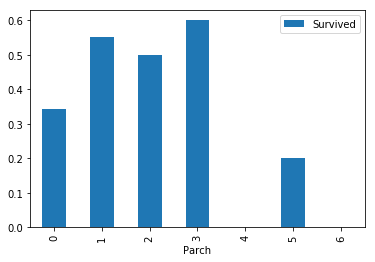

In [19]:
parch_pivot.plot.bar()
#More likely to survive if you have a parent or child on board?


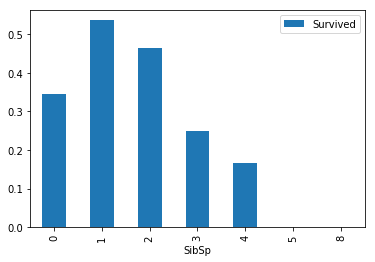

In [20]:
sibsp_pivot = X.pivot_table(index='SibSp', values='Survived')
sibsp_pivot.plot.bar()

(array([ 1., 66., 50., 27., 16., 51., 11.,  7.,  2.,  2., 15., 12.,  4.,
         4.,  5., 13.,  8.,  7.,  2.,  0.,  1.,  4.,  2.,  4.,  0.,  0.,
         6.,  0.,  2.,  4.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  0.      ,   5.123292,  10.246584,  15.369876,  20.493168,
         25.61646 ,  30.739752,  35.863044,  40.986336,  46.109628,
         51.23292 ,  56.356212,  61.479504,  66.602796,  71.726088,
         76.84938 ,  81.972672,  87.095964,  92.219256,  97.342548,
        102.46584 , 107.589132, 112.712424, 117.835716, 122.959008,
        128.0823  , 133.205592, 138.328884, 143.452176, 148.575468,
        153.69876 , 158.82

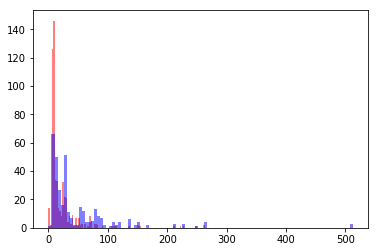

In [21]:
plt.hist(dead['Fare'], bins=100, color='r',alpha=0.5)
plt.hist(survived['Fare'], bins=100, color='b',alpha=0.5)

In [22]:
#it appear that cheaper fares resulted in higher death rate which
#makes intuitive sense since lower class ticket = lower fare

In [23]:
X.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Age_fill       False
Age_cats       False
dtype: bool

## Now start building model

In [24]:

X['Survived'].dropna(axis =0, inplace=True)
y = X.Survived
X.drop(columns='Survived', inplace=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 1)

In [27]:

def get_mae(model, X_train, X_val, y_train, y_val):
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_val)
    score = mean_absolute_error(predictions - y_val)
    return predictions, score

In [28]:
numerical_cols = ['Age']
cat_cols = ['Sex','Parch','Pclass']

X[numerical_cols].isnull().any()

Age    True
dtype: bool

In [29]:
X[cat_cols].isnull().any()

Sex       False
Parch     False
Pclass    False
dtype: bool

In [30]:
categorical_processor = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [31]:
preprocessor = ColumnTransformer([
                    ('categorical',categorical_processor, cat_cols)
                ])

In [32]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline

model = RandomForestRegressor(n_estimators=100, random_state=1)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

def get_mae(pipeline, X_train, X_val, y_train, y_val):
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_val)
    score = mean_absolute_error(predictions, y_val)
    return score
    print(score)

In [33]:
get_mae(pipeline, X_train, X_val, y_train, y_val)

0.2941404785676598

In [34]:
lowest_score = 10*100000
for x in range(50,600,50):
    model = RandomForestRegressor(n_estimators=x, random_state=1)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    score = get_mae(pipeline, X_train, X_val, y_train, y_val)
    print(x,score)
    if score < lowest_score:
        lowest_x = x
        lowest_score = score
print('Lowest score n_estimators:'+ str(lowest_x),'MAE:' +str(lowest_score))

50 0.29429255340060234
100 0.2941404785676598
150 0.29321230891216177
200 0.2937070839914594
250 0.2936875575645466
300 0.29380902608858833
350 0.2939075698402062
400 0.2937797754992669
450 0.29403767151185944
500 0.2942085825932956
550 0.2942097952459867
Lowest score n_estimators:150 MAE:0.29321230891216177


Now try with cat_cols_2 (including Age as a categorical variable)

In [35]:
cat_cols_2 = ['Sex','Parch','Pclass','Age_cats', 'SibSp']

In [36]:
preprocessor = ColumnTransformer(
                transformers=[
                    ('categorical',categorical_processor, cat_cols_2)
                ])

In [37]:
lowest_score = 10*100000
for x in range(50,600,50):
    model = RandomForestRegressor(n_estimators=x, random_state=1)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    score = get_mae(pipeline, X_train, X_val, y_train, y_val)
    print(x,score)
    if score < lowest_score:
        lowest_x = x
        lowest_score = score
print('Lowest score n_estimators:'+ str(lowest_x),'MAE:' +str(lowest_score))

50 0.281551679735501
100 0.2793344615405572
150 0.2784840848404271
200 0.27952054699510515
250 0.2789171815817583
300 0.2790519361449505
350 0.2792321320371091
400 0.27875654116608034
450 0.27892323028065685
500 0.279059742768756
550 0.2790958090496533
Lowest score n_estimators:150 MAE:0.2784840848404271


Now including imputed age and fare

In [38]:
numerical_cols_2 = ['Age','Fare']

In [39]:
num_processor = SimpleImputer(strategy='mean')

In [40]:
preprocessor = ColumnTransformer(
                transformers=[
                    ('numerical',num_processor, numerical_cols_2),
                    ('categorical',categorical_processor, cat_cols_2)
                ])

In [41]:
lowest_score = 10*100000
for x in range(50,600,50):
    model = RandomForestRegressor(n_estimators=x, random_state=1)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    score = get_mae(pipeline, X_train, X_val, y_train, y_val)
    print(x,score)
    if score < lowest_score:
        lowest_x = x
        lowest_score = score
print('Lowest score n_estimators:'+ str(lowest_x),'MAE:' +str(lowest_score))

50 0.2614653712007972
100 0.2602474876891917
150 0.25903683868033645
200 0.25870886966795037
250 0.2584209811613399
300 0.25995466392103167
350 0.2601916477358502
400 0.25936498096447647
450 0.2599200998857202
500 0.2593699667049443
550 0.25888134142435
Lowest score n_estimators:250 MAE:0.2584209811613399


Impute with median instead of mean

In [42]:
num_processor = SimpleImputer(strategy='median')
preprocessor = ColumnTransformer(
                transformers=[
                    ('numerical',num_processor, numerical_cols_2),
                    ('categorical',categorical_processor, cat_cols_2)
                ])
lowest_score = 10*100000
for x in range(50,600,50):
    model = RandomForestRegressor(n_estimators=x, random_state=1)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    score = get_mae(pipeline, X_train, X_val, y_train, y_val)
    print(x,score)
    if score < lowest_score:
        lowest_x = x
        lowest_score = score
print('Lowest score n_estimators:'+ str(lowest_x),'MAE:' +str(lowest_score))

50 0.26070378674638767
100 0.2599267531173361
150 0.2588429458765782
200 0.2582292091938953
250 0.25849631748420987
300 0.25998980877119887
350 0.26041276667670005
400 0.25951508506441245
450 0.25987191140255417
500 0.25949012472330857
550 0.25898772233790573
Lowest score n_estimators:200 MAE:0.2582292091938953


In [43]:
num_processor = SimpleImputer(strategy='mean')
categorical_processor = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [44]:
numerical_cols_2 = ['Age','Fare']

In [45]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
X.drop(columns=['Age_cats','Age_fill'],inplace=True)

In [47]:
cat_cols_3 = ['Sex','Parch','Pclass','SibSp']
numerical_cols_2 = ['Age','Fare']
model = RandomForestRegressor(n_estimators=200, random_state=1)
preprocessor = ColumnTransformer(
                transformers=[
                    ('numerical',num_processor, numerical_cols_2),
                    ('categorical',categorical_processor, cat_cols_3)
                ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
pipeline.fit(X, y)
predictions = pipeline.predict(X_test)
predictions = predictions.astype(int)


In [48]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
predictions = pd.Series(predictions, name='Survived')

In [52]:
submission = pd.DataFrame(data = {'PassengerId':X_test.PassengerId, 'Survived':predictions})

In [53]:
submission.to_csv('submission.csv',index=False)